In [3]:
import numpy as np 

import matplotlib.pyplot as plt
plt.style.use("bmh")
%matplotlib inline 

The equation for BCE loss is 
$$
BCE = -[y \log(p) + (1 - y) \log(1 - p)]
$$

we do this for pos images and negative (generated) images. In pos images p = D(x) and y=1, so BCE is 

$$
BCE = -log(D(x))
$$

for negative images (generated). we have p = D(G(x)) and y=0

$$
BCE = -log(1-D(G(z)))
$$

so the total loss for the discrimintor model is 

$$
BCE = -[log(D(x))+log(1-D(G(z)))]
$$

Like any logic gate we have 4 senerios here.

| situation | discrimintor loss | status|
| ------ | ---- | ---- |
| Disc classifying real and predicted as real| $[-(log(1)+log(0))] = np.inf$ | discrimintor failed
| Disc classifying real as real and predicted as fake | $[-(log(1)+log(1))] = 0$ | case where genertor failed because we couldn't fool discrimintor|
| Disc classifying real as fake and predicted as real | $[-(log(0)+log(0))] = np.inf$ | ideally this situation difficult to achieve|
| disc classifiying real and predicted as fake | $[-(log(0)+log(1))] = np.inf$ | ideally this situation doesn't come.|


A discrimintor is fooled, when it is struggling to distinguish between generated and real images and settling in a middle ground D(x) = 0.5 and D(G(z)) = 0.5. in this case we have 

$$
-[log(0.5)+log(0.5)] = -2*log(0.5) = -2*(log1-log(2)) = -2*(0-log2) = 2log2
$$

so expected loss is 

$$
(2)*log2*(0.5) = log(2)
$$

In [5]:
2* np.log(2)

1.3862943611198906

In [11]:
x = np.ones(100)
y = np.arange(0, 100)/100
loss = -1* x * np.log(y)
loss

/var/folders/qv/vxpyhtsx19j09jrv32tlg32m0000gn/T/ipykernel_95170/1751330961.py:3: RuntimeWarning: divide by zero encountered in log
  loss = -1* x * np.log(y)


array([       inf, 4.60517019, 3.91202301, 3.5065579 , 3.21887582,
       2.99573227, 2.81341072, 2.65926004, 2.52572864, 2.40794561,
       2.30258509, 2.20727491, 2.12026354, 2.04022083, 1.96611286,
       1.89711998, 1.83258146, 1.77195684, 1.71479843, 1.66073121,
       1.60943791, 1.56064775, 1.51412773, 1.46967597, 1.42711636,
       1.38629436, 1.34707365, 1.30933332, 1.27296568, 1.23787436,
       1.2039728 , 1.17118298, 1.13943428, 1.10866262, 1.07880966,
       1.04982212, 1.02165125, 0.99425227, 0.96758403, 0.94160854,
       0.91629073, 0.89159812, 0.86750057, 0.84397007, 0.82098055,
       0.7985077 , 0.77652879, 0.75502258, 0.73396918, 0.71334989,
       0.69314718, 0.67334455, 0.65392647, 0.63487827, 0.61618614,
       0.597837  , 0.5798185 , 0.56211892, 0.54472718, 0.52763274,
       0.51082562, 0.49429632, 0.4780358 , 0.46203546, 0.4462871 ,
       0.43078292, 0.41551544, 0.40047757, 0.38566248, 0.37106368,
       0.35667494, 0.34249031, 0.32850407, 0.31471074, 0.30110

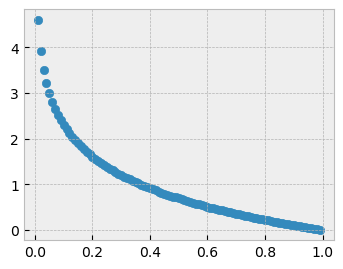

In [12]:
plt.figure(figsize=(4, 3))
plt.scatter(y, loss) # we added -1 because loss needs to be positive
plt.show()

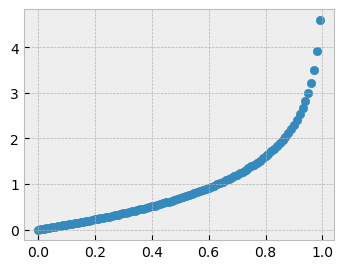

In [15]:
x = np.zeros(100)
y = np.arange(0, 100)/100
loss2 = -1 *(1-x) * np.log((1-y))
plt.figure(figsize=(4, 3))
plt.scatter(y, loss2) # we added -1 because loss needs to be positive
plt.show()

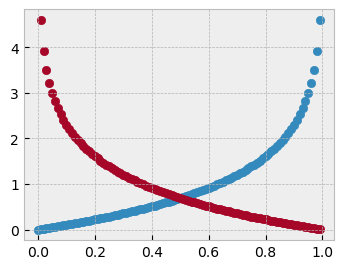

In [16]:
plt.figure(figsize=(4, 3))
plt.scatter(y, loss2)
plt.scatter(y, loss)
plt.show()

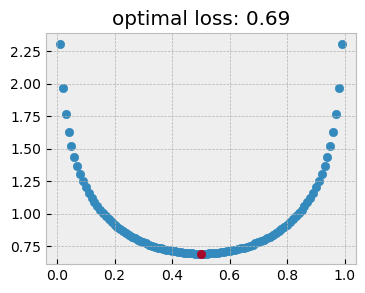

In [22]:
avg = (loss+loss2)/2
plt.figure(figsize=(4, 3))
plt.scatter(y, avg)
plt.scatter(y[len(y)//2], np.min(avg))
plt.title(f"optimal loss: {round(np.min(avg), 2)}")
plt.show()

## Earth mover distance 

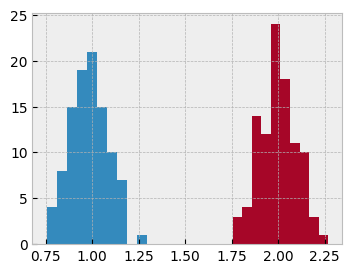

In [10]:
p = torch.normal(1, 0.1, size=(100, 1))
q = torch.normal(2, 0.1, size=(100, 1))
plt.figure(figsize=(4, 3))
plt.hist(p.numpy().reshape(-1))
plt.hist(q.numpy().reshape(-1))
plt.show()

# For real samples:
mse_real = (1 - 0.5)**2  = (y_real - D(x))^2

# For fake samples:
mse_fake = (0 - 0.5)**2  = (y_fake - D(G(z)))^2

# Expected MSE Loss:
E_mse = 0.5 * mse_real + 0.5 * mse_fake  

$$

= 0.5 * (0.5)^2 + 0.5 * (0.5)^2  

= 0.5 * 0.25 + 0.5 * 0.25  

= 0.25

$$